In [1]:
import numpy as np
from sympy import symbols, Matrix
from scipy.integrate import solve_ivp
import scipy.linalg as la
import matplotlib.pylab as plt

Sensitivity matrix S =
 [[0.0000e+00 0.0000e+00 2.1565e-06 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 1.0389e-03 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 1.3565e-06 0.0000e+00 0.0000e+00 0.0000e+00]]
Max Value: 1.0
Max Position: (2, 2)

elasticity matrix E =
 [[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
Max Value: (1+0j)
Max Position: (2, 2)



Text(0.5, 1.0, 'Elasticity matrix binary heat map')

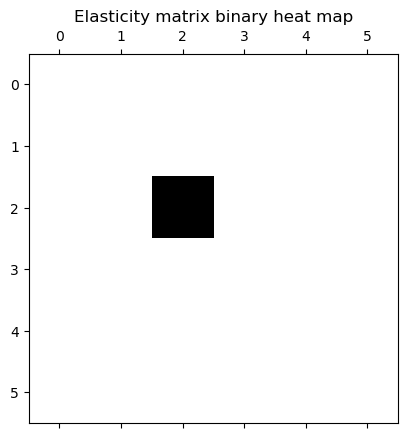

In [2]:
N_crypts = 1e+7
r1 = 156
u = 10e-7 * r1
mu = 10e-9 * r1
gamma3 = 0.2
gamma4 = 0.07
gamma5 = 0.07
delta = 0.05
KA = 562
KR = 1780

R12 = 2*u
R14 = mu
R23 = u
R25 = mu
R36 = mu
R45 = 2*u 
R56 = u


# define the transition matrix A
A = np.array([
    [1 - (R12 + R14), 0, 0, 0, 0, 0],
    [R12, 1-(R23 + R25), 0, 0, 0, 0],
    [0, R23, (1-R36)+gamma3-delta, 0, 0, R36],
    [R14, 0, 0, (1-R45)+gamma4-delta, 0, 0],
    [0, R25, 0, R45, (1-R56)+gamma5-delta, R56],
    [0, 0, 0, 0, 0, 0]
])

l,v = la.eig(A)

idx=np.argsort(np.abs(l))
l_sorted=l[idx]  
v_sorted=v[:,idx]   #rearrange eigenvectors in same order
lambda_max= l_sorted[-1] #dom eigenvalue
v_max = v_sorted[:,-1] #dom eigenvector

l,v_left = la.eig(np.matrix.transpose(A))
idx=np.argsort(np.abs(l))
l_sorted=l[idx]
v_left_sorted=v_left[:,idx]   #rearrange eigenvectors in same order
v_left_max = v_left_sorted[:,-1]

As = np.outer(v_left_max,v_max)/np.dot(v_left_max,v_max)

# set print format so we can see the necessary decimals
np.set_printoptions(precision=4, suppress=False)

# Print sensitivity matrix
print("Sensitivity matrix S =\n", np.real(As))
max_value_As = np.max(As)
max_position_As = np.unravel_index(np.argmax(As), As.shape)
print("Max Value:", max_value_As)
print("Max Position:", max_position_As)
print()

# Print elasticity (for fun)
E = A * As / lambda_max
print("elasticity matrix E =\n", np.real(E))
max_value_E = np.max(E)
max_position_E = np.unravel_index(np.argmax(E), E.shape)
print("Max Value:", max_value_E)
print("Max Position:", max_position_E)
print()

# Print elasticity
plt.spy(np.real(E))
plt.title('Elasticity matrix binary heat map')